In [1]:
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile
from qiskit.quantum_info import Operator

import matplotlib.pyplot as plt

import numpy as np

def visualize_result(res):
    n_qubit = len(list(res.keys())[0])
    for i in range(2 ** n_qubit):
        label ="{0:b}".format(i).rjust(n_qubit, '0')
        if not label in res.keys():
            res[label] = 0
    
    sorted_res = dict(sorted(res.items()))

    print(sorted_res)

    plt.title("Counts")
    plt.ylabel("Frequency")
    plt.xlabel("Measured State")
    plt.bar(sorted_res.keys(), sorted_res.values(), color='green')



not_gates = []
{'000': 100000, '001': 0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 0}
not_gates = [0]
{'000': 0, '001': 100000, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 0}
not_gates = [1]
{'000': 0, '001': 0, '010': 100000, '011': 0, '100': 0, '101': 0, '110': 0, '111': 0}
not_gates = [0, 1]
{'000': 0, '001': 0, '010': 0, '011': 100000, '100': 0, '101': 0, '110': 0, '111': 0}
not_gates = [2]
{'000': 0, '001': 0, '010': 0, '011': 0, '100': 100000, '101': 0, '110': 0, '111': 0}
not_gates = [0, 2]
{'000': 0, '001': 0, '010': 0, '011': 0, '100': 0, '101': 100000, '110': 0, '111': 0}
not_gates = [1, 2]
{'000': 0, '001': 0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 100000, '111': 0}
not_gates = [0, 1, 2]
{'000': 0, '001': 0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 100000}


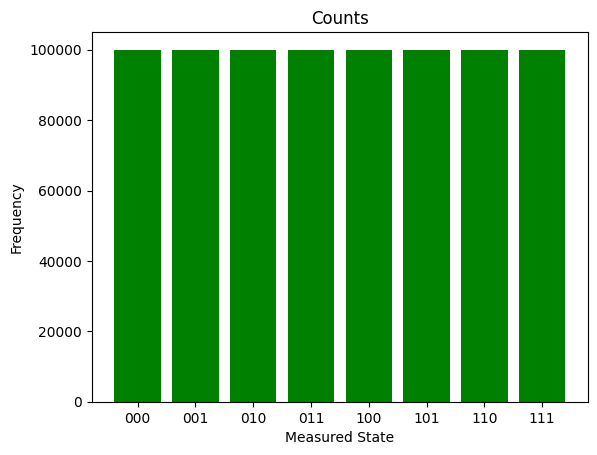

In [25]:
for not_gates in [[], [0], [1], [0, 1], [2], [0, 2], [1, 2], [0, 1, 2]]:

    # circuit
    qr = QuantumRegister(3)
    cr = ClassicalRegister(3)

    qc = QuantumCircuit(qr, cr)

    if len(not_gates) > 0:
        qc.x(not_gates)

    qc.h(2)
    qc.cp(-np.pi / np.pow(2, 2), 1, 2)
    qc.cp(-np.pi / np.pow(2, 3), 0, 2)

    qc.h(1)
    qc.cp(-np.pi / np.pow(2, 2), 0, 1)

    qc.h(0)

    qc.swap(0, 2)

    qc.swap(0, 2)

    qc.h(0)

    qc.cp(np.pi / np.pow(2, 2), 0, 1)
    qc.h(1)

    qc.cp(np.pi / np.pow(2, 3), 0, 2)
    qc.cp(np.pi / np.pow(2, 2), 1, 2)
    qc.h(2)


    qc.measure(0, 0)
    qc.measure(1, 1)
    qc.measure(2, 2)

    qc.draw(output='mpl')

    # execution
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)

    sim_result = simulator.run(compiled_circuit, shots=100000).result()
    counts = sim_result.get_counts()

    #visualization
    print(f"not_gates = {not_gates}")
    visualize_result(counts)
    qc.draw(output='mpl')

not_gates = []
{'000': 100000, '001': 0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 0}
not_gates = [0]
{'000': 0, '001': 100000, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 0}
not_gates = [1]
{'000': 0, '001': 0, '010': 100000, '011': 0, '100': 0, '101': 0, '110': 0, '111': 0}
not_gates = [0, 1]
{'000': 0, '001': 0, '010': 0, '011': 100000, '100': 0, '101': 0, '110': 0, '111': 0}
not_gates = [2]
{'000': 0, '001': 0, '010': 0, '011': 0, '100': 100000, '101': 0, '110': 0, '111': 0}
not_gates = [0, 2]
{'000': 0, '001': 0, '010': 0, '011': 0, '100': 0, '101': 100000, '110': 0, '111': 0}
not_gates = [1, 2]
{'000': 0, '001': 0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 100000, '111': 0}
not_gates = [0, 1, 2]
{'000': 0, '001': 0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 100000}


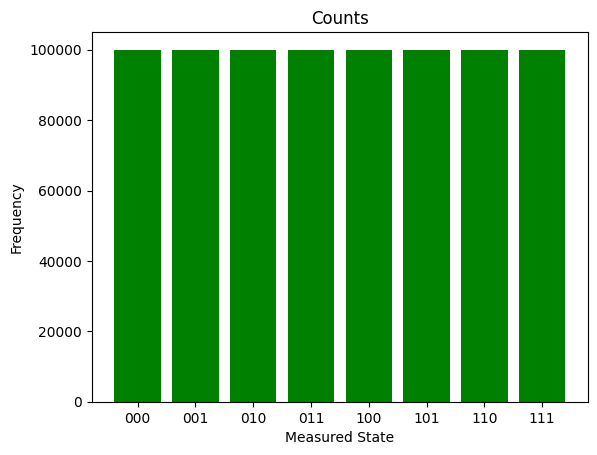

In [26]:
for not_gates in [[], [0], [1], [0, 1], [2], [0, 2], [1, 2], [0, 1, 2]]:

    # circuit
    qr = QuantumRegister(3)
    cr = ClassicalRegister(3)

    qc = QuantumCircuit(qr, cr)

    if len(not_gates) > 0:
        qc.x(not_gates)

    qc.h(2)
    qc.cp(-np.pi / np.pow(2, 2), 1, 2)
    qc.cp(-np.pi / np.pow(2, 3), 0, 2)

    qc.h(1)
    qc.cp(-np.pi / np.pow(2, 2), 0, 1)

    qc.h(0)

    qc.swap(0, 2)

    qc.h(2)
    qc.cp(np.pi / np.pow(2, 2), 1, 2)
    qc.cp(np.pi / np.pow(2, 3), 0, 2)

    qc.h(1)
    qc.cp(np.pi / np.pow(2, 2), 0, 1)

    qc.h(0)

    qc.swap(0, 2)


    qc.measure(0, 0)
    qc.measure(1, 1)
    qc.measure(2, 2)

    qc.draw(output='mpl')

    # execution
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)

    sim_result = simulator.run(compiled_circuit, shots=100000).result()
    counts = sim_result.get_counts()

    #visualization
    print(f"not_gates = {not_gates}")
    visualize_result(counts)
    qc.draw(output='mpl')

not_gates = [0, 1, 2]
{'000': 0, '001': 0, '010': 0, '011': 100000, '100': 0, '101': 0, '110': 0, '111': 0}


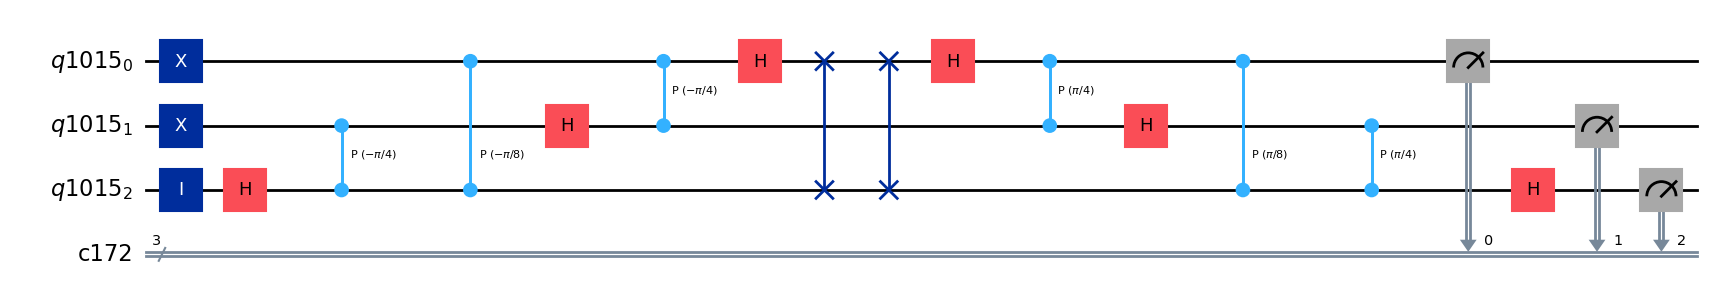

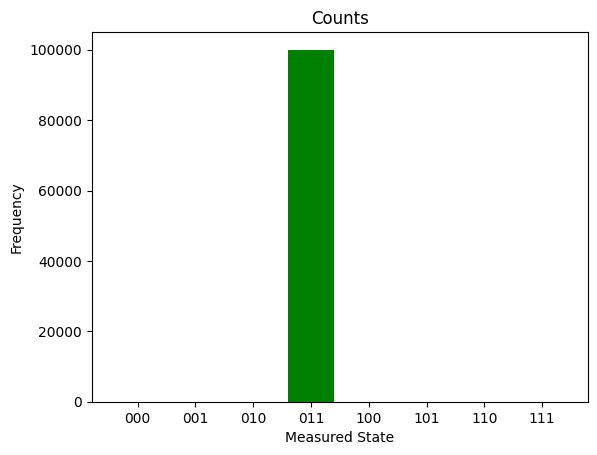

In [31]:
# circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

qc = QuantumCircuit(qr, cr)

qc.x([0, 1])
qc.id(2)

qc.h(2)
qc.cp(-np.pi / np.pow(2, 2), 1, 2)
qc.cp(-np.pi / np.pow(2, 3), 0, 2)

qc.h(1)
qc.cp(-np.pi / np.pow(2, 2), 0, 1)

qc.h(0)

qc.swap(0, 2)

qc.swap(0, 2)

qc.h(0)

qc.cp(np.pi / np.pow(2, 2), 0, 1)
qc.h(1)

qc.cp(np.pi / np.pow(2, 3), 0, 2)
qc.cp(np.pi / np.pow(2, 2), 1, 2)
qc.h(2)


qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

qc.draw(output='mpl')

# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
print(f"not_gates = {not_gates}")
visualize_result(counts)
qc.draw(output='mpl')

not_gates = [0, 1, 2]
{'000': 0, '001': 0, '010': 0, '011': 100000, '100': 0, '101': 0, '110': 0, '111': 0}


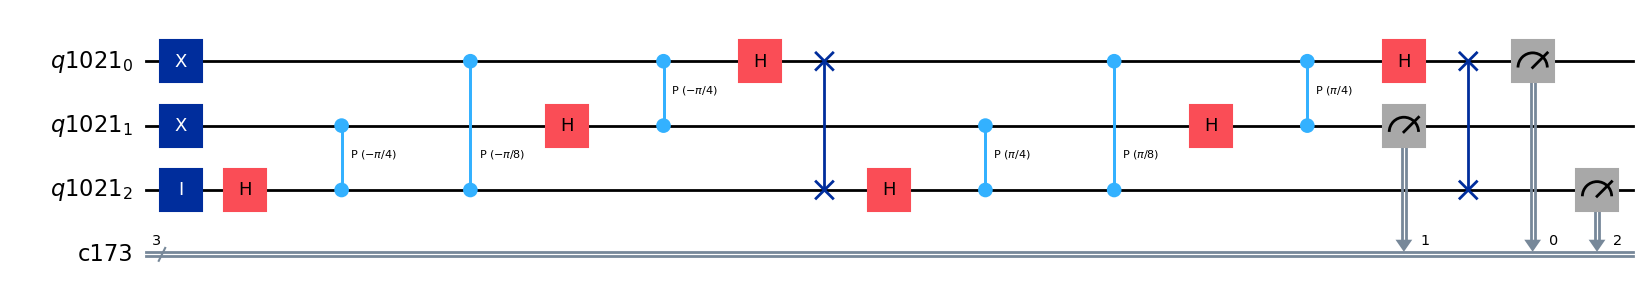

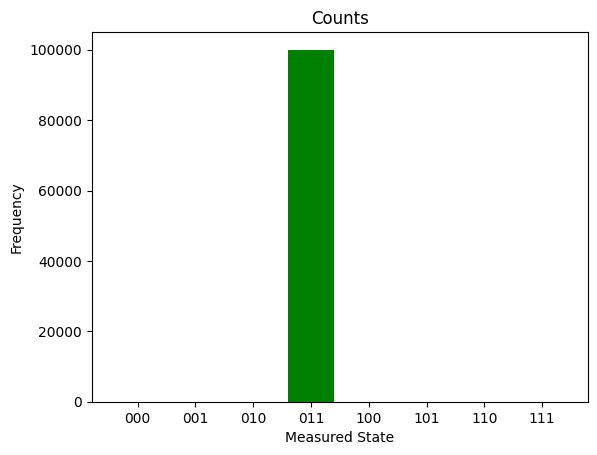

In [32]:
# circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

qc = QuantumCircuit(qr, cr)

qc.x([0, 1])
qc.id(2)

qc.h(2)
qc.cp(-np.pi / np.pow(2, 2), 1, 2)
qc.cp(-np.pi / np.pow(2, 3), 0, 2)

qc.h(1)
qc.cp(-np.pi / np.pow(2, 2), 0, 1)

qc.h(0)

qc.swap(0, 2)

qc.h(2)
qc.cp(np.pi / np.pow(2, 2), 1, 2)
qc.cp(np.pi / np.pow(2, 3), 0, 2)

qc.h(1)
qc.cp(np.pi / np.pow(2, 2), 0, 1)

qc.h(0)

qc.swap(0, 2)


qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

qc.draw(output='mpl')

# execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

sim_result = simulator.run(compiled_circuit, shots=100000).result()
counts = sim_result.get_counts()

#visualization
print(f"not_gates = {not_gates}")
visualize_result(counts)
qc.draw(output='mpl')